In [ ]:
## Digit Recognizer
# https://www.kaggle.com/competitions/digit-recognizer

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


def normalize_df(dataframe: pd.DataFrame) -> pd.DataFrame:
    return dataframe/255

def show_image(image: np.array, title: str) -> None:
    plt.title(title)
    plt.imshow(image, cmap="grey")
    plt.show()
    
def predict_digit(image: np.array, model) -> None:
    prediction = model.predict(image.reshape((1, 784)))
    show_image(image.reshape((28,28)), f"Predicted digit: {np.argmax(prediction)}")       

def evaluation(history: tf.keras.callbacks.History, model, X_train: pd.DataFrame, y_train: pd.DataFrame) -> None:
    # Train x Test
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    
    # Train x Test
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    
    # Confusion Matrix
    y_pred = model.predict(X_train)
    y_pred = np.argmax(y_pred, axis=1)
    cm = confusion_matrix(y_train, y_pred)
    print(f"Confusion Matrix: \n{cm} \n\n")
    
    # Classification Report
    print( f"Report: \n{classification_report(y_train, y_pred)}")
    

In [2]:
train_dataset: pd.DataFrame = pd.read_csv('train.csv')

y = train_dataset['label']
X = train_dataset.drop(columns=['label'])

X_train, X_test, y_train, y_test = train_test_split(normalize_df(X), y, test_size=0.30, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.50, random_state=42)

In [4]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [5]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

Epoch 1/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.8327 - loss: 0.5615 - val_accuracy: 0.9510 - val_loss: 0.1582
Epoch 2/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9600 - loss: 0.1356 - val_accuracy: 0.9635 - val_loss: 0.1185
Epoch 3/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.9722 - loss: 0.0901 - val_accuracy: 0.9590 - val_loss: 0.1234
Epoch 4/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9795 - loss: 0.0649 - val_accuracy: 0.9654 - val_loss: 0.1181
Epoch 5/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9861 - loss: 0.0423 - val_accuracy: 0.9656 - val_loss: 0.1115
Epoch 6/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.9872 - loss: 0.0394 - val_accuracy: 0.9705 - val_loss: 0.1063
Epoch 7/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9916 - loss: 0.0260 - val_accuracy: 0.9703 - val_loss: 0.1060
Epoch 8/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9931 - loss: 0.0209 - v

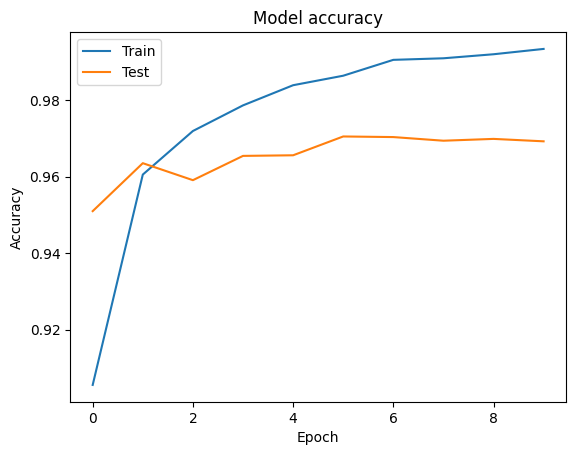

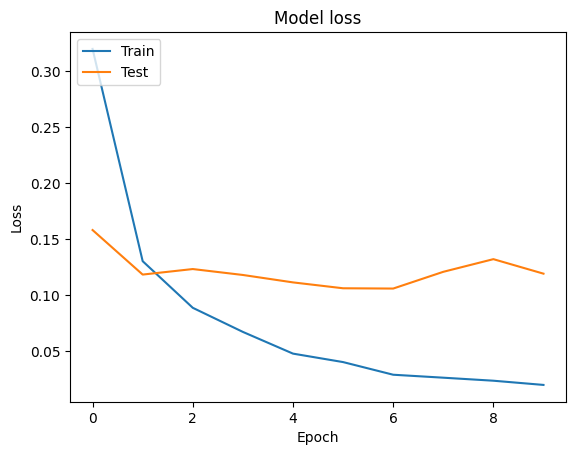

919/919 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step
Confusion Matrix: 
[[2925    0    0    0    2    0    5    0    0    0]
 [   0 3288    0    0    1    0    0    1    4    1]
 [   0    4 2865    0   10    0    0    3    0    1]
 [   2    2   12 2942    0    5    0    8   17    8]
 [   0    0    0    0 2849    0    0    0    1    0]
 [   1    0    1    2    0 2699    2    0    5    0]
 [   2    0    0    0    0    0 2879    0    0    0]
 [   1    5    0    0    1    0    0 3031    0    4]
 [   1    1    1    0    4    5    1    1 2840    0]
 [   1    0    0    0   27    4    0    7    4 2914]] 


Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2932
           1       1.00      1.00      1.00      3295
           2       1.00      0.99      0.99      2883
           3       1.00      0.98      0.99      2996
           4       0.98      1.00      0.99      2850
           5       0.99      1.00      1.00      2710
           6      

In [14]:
evaluation(history, model, X_train, y_train)

In [ ]:
submission_dataset: pd.DataFrame = pd.read_csv('test.csv')

for sample in normalize_df(submission_dataset).iterrows():
    image = sample[1].to_numpy()
    print(image.shape)
    predict_digit(image, model)